In [4]:
import sys
sys.path.append("C:/JBasineni/Mach_learn/ud120-projects-master/ud120-projects-master/tools/")
sys.path.append('C:/JBasineni/Mach_learn/ud120-projects-master/ud120-projects-master/choose_your_own')
sys.path.append('C:/JBasineni/Mach_learn/ud120-projects-master/ud120-projects-master/svm')

import os
os.chdir('C:/JBasineni/Mach_learn/ud120-projects-master/ud120-projects-master/svm')


from class_vis import prettyPicture
from prep_terrain_data import makeTerrainData

import sys
import matplotlib.pyplot as plt
import copy
import numpy as np
import pylab as pl

from sklearn.metrics import accuracy_score


features_train, labels_train, features_test, labels_test = makeTerrainData()


########################## SVM #################################
from sklearn.svm import SVC

def submitAccuracy():
    return accuracy_score(pred, labels_test)

#clf = SVC(kernel="linear")
clf = SVC()
clf.fit(features_train, labels_train)
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
pred = clf.predict(features_test)

print(accuracy_score(pred, labels_test))


0.92


In [25]:
#Exampless to test parameters
import numpy as np
X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
y = np.array([1, 1, 2, 2])
from sklearn.svm import SVC 
clf = SVC()
clf.fit(X, y) 
SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
print(clf.predict([[-0.8, -1]]))

[1]


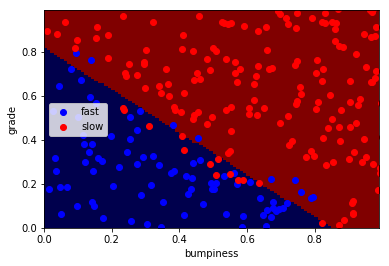

In [33]:
#Testing Gamma and KErnel

clf = SVC(kernel="linear", gamma=1)
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

%matplotlib inline
prettyPicture(clf, features_test, labels_test)


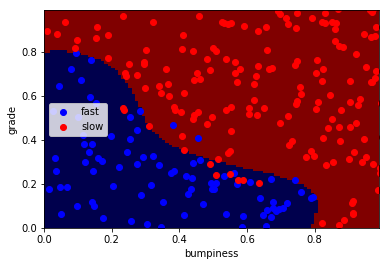

In [34]:
# C Parameter
clf = SVC(kernel="rbf", C=10**5)
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

%matplotlib inline
prettyPicture(clf, features_test, labels_test)


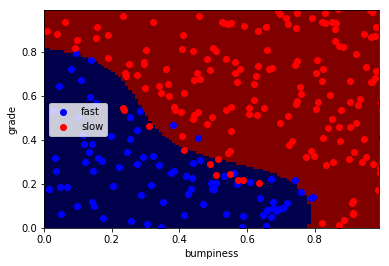

In [35]:
# Gamma Parameter effect
clf = SVC(kernel="rbf", gamma=10)
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

%matplotlib inline
prettyPicture(clf, features_test, labels_test)

In [2]:
import pickle
import _pickle as cPickle
import numpy

from sklearn import cross_validation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectPercentile, f_classif



def preprocess(words_file = "../tools/word_data.pkl", authors_file="../tools/email_authors.pkl"):
    """ 
        this function takes a pre-made list of email texts (by default word_data.pkl)
        and the corresponding authors (by default email_authors.pkl) and performs
        a number of preprocessing steps:
            -- splits into training/testing sets (10% testing)
            -- vectorizes into tfidf matrix
            -- selects/keeps most helpful features
        after this, the feaures and labels are put into numpy arrays, which play nice with sklearn functions
        4 objects are returned:
            -- training/testing features
            -- training/testing labels
    """

    ### the words (features) and authors (labels), already largely preprocessed
    ### this preprocessing will be repeated in the text learning mini-project
    authors_file_handler = open(authors_file, "rb")
    authors = pickle.load(authors_file_handler)
    authors_file_handler.close()

    words_file_handler = open(words_file, "rb")
    word_data = cPickle.load(words_file_handler)
    words_file_handler.close()

    ### test_size is the percentage of events assigned to the test set
    ### (remainder go into training)
    features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(word_data, authors, test_size=0.1, random_state=42)



    ### text vectorization--go from strings to lists of numbers
    vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,
                                 stop_words='english')
    features_train_transformed = vectorizer.fit_transform(features_train)
    features_test_transformed  = vectorizer.transform(features_test)



    ### feature selection, because text is super high dimensional and 
    ### can be really computationally chewy as a result
    selector = SelectPercentile(f_classif, percentile=10)
    selector.fit(features_train_transformed, labels_train)
    features_train_transformed = selector.transform(features_train_transformed).toarray()
    features_test_transformed  = selector.transform(features_test_transformed).toarray()

    ### info on the data
    print ("no. of Chris training emails:", sum(labels_train))
    print ("no. of Sara training emails:", len(labels_train)-sum(labels_train))
    
    return features_train_transformed, features_test_transformed, labels_train, labels_test


In [5]:
#!/usr/bin/python

""" 
    This is the code to accompany the Lesson 2 (SVM) mini-project.

    Use a SVM to identify emails from the Enron corpus by their authors:    
    Sara has label 0
    Chris has label 1
"""
from sklearn.metrics import accuracy_score

from time import time
#from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()


def my_svm(features_train, features_test, labels_train, labels_test, kernel='linear', C=1.0):
    # the classifier
    clf = SVC(kernel=kernel, C=C)

    # train
    t0 = time()
    clf.fit(features_train, labels_train)
    print ("\ntraining time:", round(time()-t0, 3), "s")

    # predict
    t0 = time()
    pred = clf.predict(features_test)
    print ("predicting time:", round(time()-t0, 3), "s")

    accuracy = accuracy_score(pred, labels_test)

    print ('\naccuracy = {0}'.format(accuracy))
    return pred

pred = my_svm(features_train, features_test, labels_train, labels_test)


no. of Chris training emails: 7936
no. of Sara training emails: 7884

training time: 239.218 s
predicting time: 23.838 s

accuracy = 0.9840728100113766


In [9]:
# Have to add // as I was getting the error 
#TypeError: slice indices must be integers or None or have an __index__ 

features_train2 = features_train[:int(len(features_train))//100] 
labels_train2 = labels_train[:int(len(labels_train))//100] 

pred = my_svm(features_train2, features_test, labels_train2, labels_test)



training time: 0.141 s
predicting time: 1.398 s

accuracy = 0.8845278725824801


In [10]:
#Deploy an Kernel rbf

pred = my_svm(features_train2, features_test, labels_train2, labels_test, 'rbf')


training time: 0.148 s
predicting time: 1.56 s

accuracy = 0.6160409556313993


In [17]:
#Deploy different parameter C values (say, 10.0, 100., 1000., and 10000.)

for C in [10, 100, 1000, 10000]:
    print ('C =',C,)
    pred = my_svm(features_train2, features_test, labels_train2, labels_test, kernel='rbf', C=C)
    print ('\n\n')


C = 10

training time: 0.153 s
predicting time: 1.55 s

accuracy = 0.6160409556313993



C = 100

training time: 0.145 s
predicting time: 1.614 s

accuracy = 0.6160409556313993



C = 1000

training time: 0.144 s
predicting time: 1.526 s

accuracy = 0.8213879408418657



C = 10000

training time: 0.136 s
predicting time: 1.273 s

accuracy = 0.8924914675767918





In [18]:
#Optimized rbf with C vs Linear SVM accuracy
pred = my_svm(features_train, features_test, labels_train, labels_test, kernel='rbf', C=10000)


training time: 148.813 s
predicting time: 14.953 s

accuracy = 0.9908987485779295


In [19]:
print (pred[10])
print (pred[26])
print (pred[50])

1
0
1


In [20]:
#How many Chris emails predicted
print (sum(pred))

877
